In [775]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, metrics

pd.options.display.max_rows = None
# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Importing and understanding the data

In [776]:
# importing the data set

data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [777]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [778]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [779]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [780]:
# subsetting the numerical columns to check the linearity between the target variable and other variables with a heat map

data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [781]:
data_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [782]:
# dropping few numerical type columns which are actually non numeric

data_numeric = data_numeric.drop(columns=['Id', 'MSSubClass', 'YearBuilt', 'YearRemodAdd', 'OverallQual' , 'OverallCond',
                                          'GarageYrBlt', 'MoSold', 'YrSold'], axis=1)

In [783]:
cor =  data_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


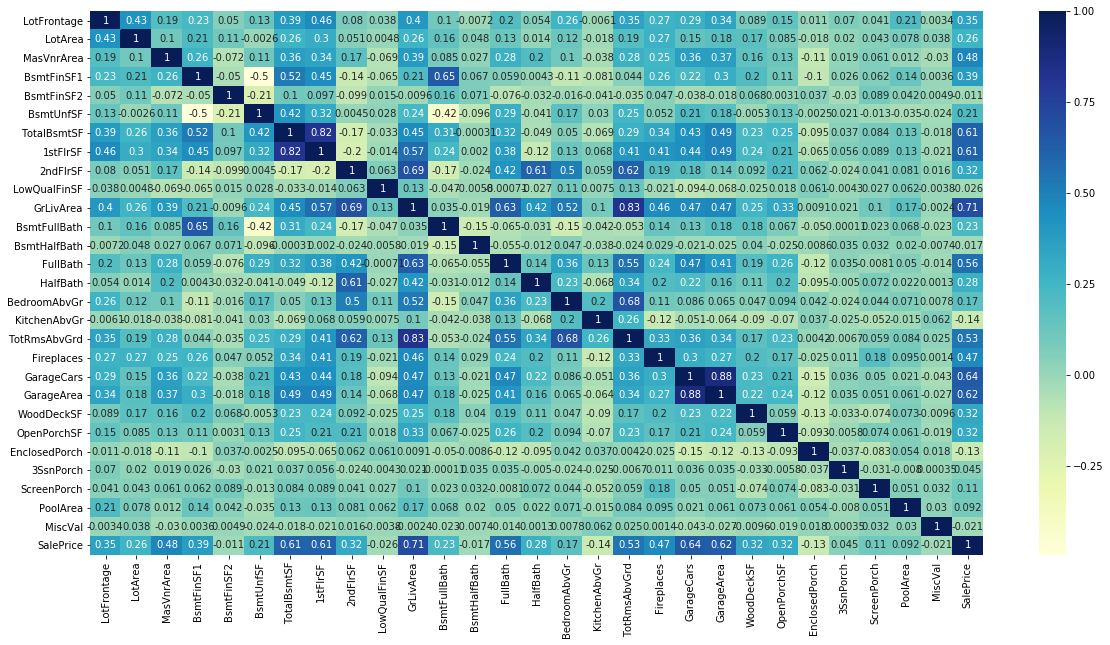

In [784]:
# plotting correlations on heatmap

plt.figure(figsize=(20,10))

sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Thre above heat map shows that the target variable SalePrice is highly correlated with GrLivArea, GarageCars, GarageArea, TotalBsmntSF, 1stFlrSF, FullBath and negatively correlated with KitchenAbvGr, EnclosedPorch

###  

## Data Cleaning

In [785]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [786]:
# Changing the data types of some categorical columns

data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['MoSold'] = data['MoSold'].astype('object')
data['YrSold'] = data['YrSold'].astype('object')

In [787]:
# Deriving age values for few year columns

data['BuildingAge'] = 2020 - data['YearBuilt']
data['RemodelAge'] = 2020 - data['YearRemodAdd']
data['GarageAge'] = 2020 - data['GarageYrBlt']

# dropping the original year columns

data.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], inplace=True)

In [788]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 

## Handling missing values

In [789]:
# handling the missing values

round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

In [790]:
# dropping the columns with high percentage of missing values

data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True)

In [791]:
# Replacing meaningful missing values

data['MasVnrType'].replace('None', 'No Masonry', inplace=True)
data['BsmtExposure'].replace('No', 'No Exposure', inplace=True)

In [792]:
# Replacing missing values of numerical columns with mean

data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['GarageAge'].fillna(data['GarageAge'].mean(), inplace=True)

In [793]:
# Replacing missing values of categorical columns with mode

data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0], inplace=True)
data['BsmtQual'].fillna(data['BsmtQual'].mode()[0], inplace=True)
data['BsmtCond'].fillna(data['BsmtCond'].mode()[0], inplace=True)
data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0], inplace=True)
data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0], inplace=True)
data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0], inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)
data['GarageType'].fillna(data['GarageType'].mode()[0], inplace=True)
data['GarageFinish'].fillna(data['GarageFinish'].mode()[0], inplace=True)
data['GarageQual'].fillna(data['GarageQual'].mode()[0], inplace=True)
data['GarageCond'].fillna(data['GarageCond'].mode()[0], inplace=True)

In [794]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

In [795]:
# Dropping highly skewed columns

skewed_cols = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'BsmtCond',
               'BsmtFinType2','Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 
               'SaleType']
data.drop(columns=skewed_cols, inplace=True)

## Data Visualization

In [796]:
# Extracting all the numerical columns to plot the data

num_list = data.select_dtypes(include=['float64', 'int64'])
num_list = num_list.drop(['Id', 'SalePrice'],1)
num_list.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'BuildingAge', 'RemodelAge', 'GarageAge'],
      dtype='object')

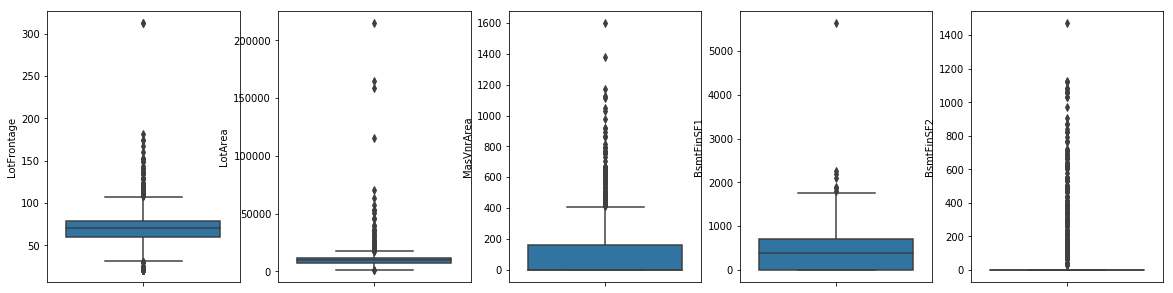

In [797]:
# Univariate analysis for numerical coclumns

plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(data['LotFrontage'], orient='v')
plt.subplot(1,5,2)
sns.boxplot(data['LotArea'], orient='v')
plt.subplot(1,5,3)
sns.boxplot(data['MasVnrArea'], orient='v')
plt.subplot(1,5,4)
sns.boxplot(data['BsmtFinSF1'], orient='v')
plt.subplot(1,5,5)
sns.boxplot(data['BsmtFinSF2'], orient='v')
plt.show()

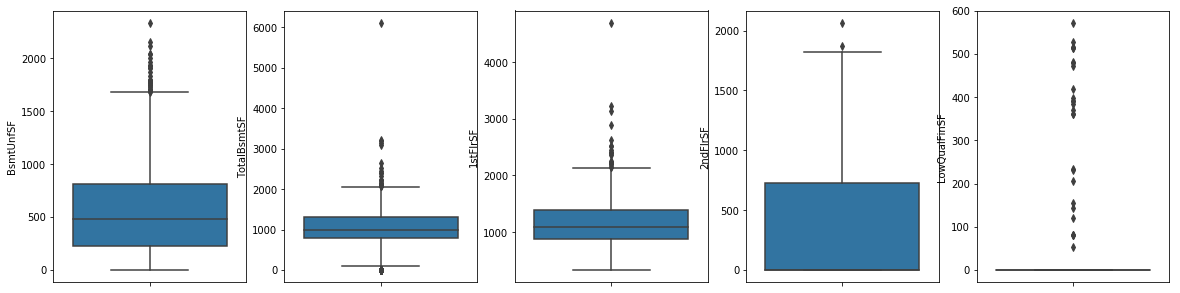

In [798]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(data['BsmtUnfSF'], orient='v')
plt.subplot(1,5,2)
sns.boxplot(data['TotalBsmtSF'], orient='v')
plt.subplot(1,5,3)
sns.boxplot(data['1stFlrSF'], orient='v')
plt.subplot(1,5,4)
sns.boxplot(data['2ndFlrSF'], orient='v')
plt.subplot(1,5,5)
sns.boxplot(data['LowQualFinSF'], orient='v')
plt.show()

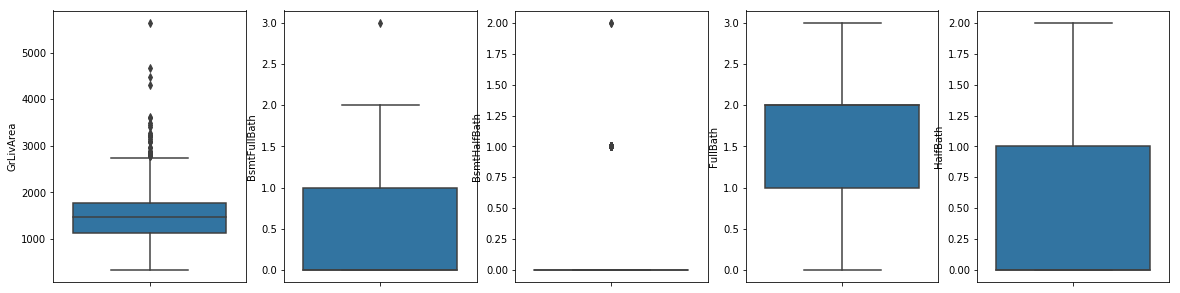

In [799]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(data['GrLivArea'], orient='v')
plt.subplot(1,5,2)
sns.boxplot(data['BsmtFullBath'], orient='v')
plt.subplot(1,5,3)
sns.boxplot(data['BsmtHalfBath'], orient='v')
plt.subplot(1,5,4)
sns.boxplot(data['FullBath'], orient='v')
plt.subplot(1,5,5)
sns.boxplot(data['HalfBath'], orient='v')
plt.show()

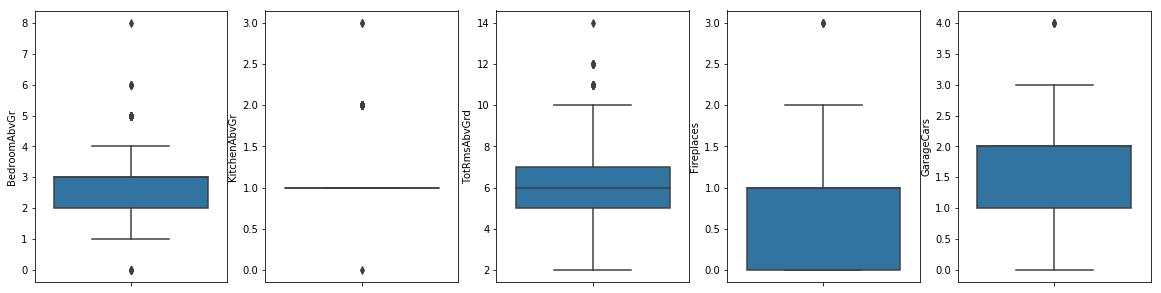

In [800]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(data['BedroomAbvGr'], orient='v')
plt.subplot(1,5,2)
sns.boxplot(data['KitchenAbvGr'], orient='v')
plt.subplot(1,5,3)
sns.boxplot(data['TotRmsAbvGrd'], orient='v')
plt.subplot(1,5,4)
sns.boxplot(data['Fireplaces'], orient='v')
plt.subplot(1,5,5)
sns.boxplot(data['GarageCars'], orient='v')
plt.show()

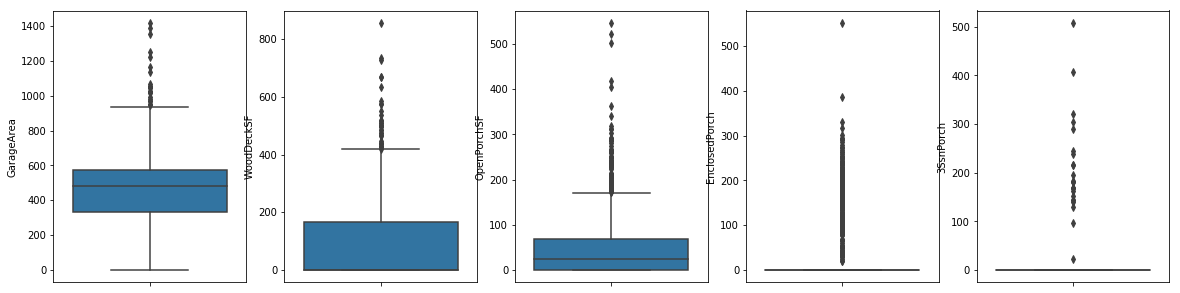

In [801]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(data['GarageArea'], orient='v')
plt.subplot(1,5,2)
sns.boxplot(data['WoodDeckSF'], orient='v')
plt.subplot(1,5,3)
sns.boxplot(data['OpenPorchSF'], orient='v')
plt.subplot(1,5,4)
sns.boxplot(data['EnclosedPorch'], orient='v')
plt.subplot(1,5,5)
sns.boxplot(data['3SsnPorch'], orient='v')
plt.show()

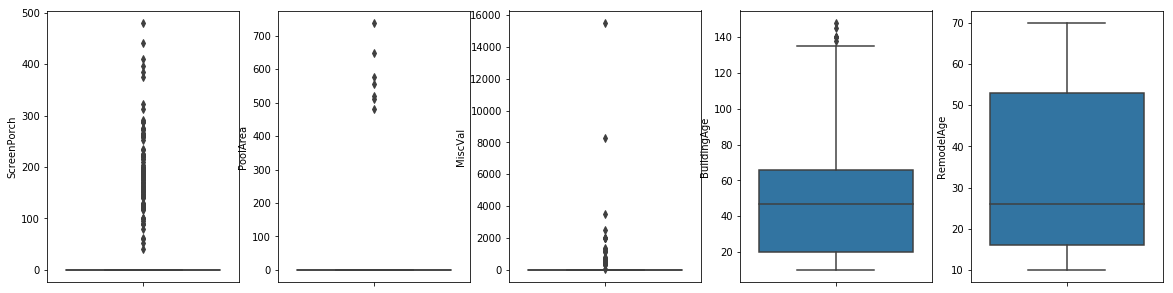

In [802]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(data['ScreenPorch'], orient='v')
plt.subplot(1,5,2)
sns.boxplot(data['PoolArea'], orient='v')
plt.subplot(1,5,3)
sns.boxplot(data['MiscVal'], orient='v')
plt.subplot(1,5,4)
sns.boxplot(data['BuildingAge'], orient='v')
plt.subplot(1,5,5)
sns.boxplot(data['RemodelAge'], orient='v')
plt.show()

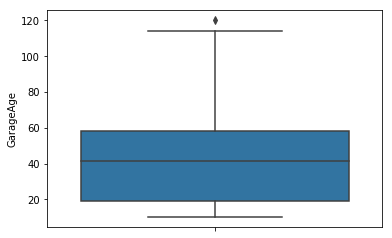

In [803]:
sns.boxplot(data['GarageAge'], orient='v')
plt.show()

## Combining categories column wise

In [804]:
data['MSZoning'].replace(to_replace=['FV', 'RH', 'C (all)'], value='MSZoning3', inplace=True)
data['LotShape'].replace(to_replace=['IR2', 'IR3'], value='LotShape3', inplace=True)
data['LotConfig'].replace(to_replace=['CulDSac', 'FR2', 'FR3'], value='LotConfig3', inplace=True)
data['BldgType'].replace(to_replace=['Duplex', 'Twnhs', '2fmCon'], value='BldgType3', inplace=True)
data['HouseStyle'].replace(to_replace=['SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'], value='HouseStyle4', inplace=True)
data['OverallQual'].replace(to_replace=[9, 3, 10, 2, 1], value='OverallQual6', inplace=True)
data['OverallCond'].replace(to_replace=[8, 4, 3, 9, 2, 1], value='OverallCond4', inplace=True)
data['RoofStyle'].replace(to_replace=['Flat', 'Gambrel', 'Mansard', 'Shed'], value='RoofStyle3', inplace=True)
data['Exterior1st'].replace(to_replace=['WdShing', 'Stucco', 'AsbShng', 'Stone', 'BrkComm',
                                        'CBlock', 'AsphShn', 'ImStucc'], value='Exterior1st8', inplace=True)
data['Exterior2nd'].replace(to_replace=['Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 
                                        'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock'], value='Exterior2nd7', inplace=True)
data['ExterCond'].replace(to_replace=['Fa', 'Ex', 'Po'], value='ExterCond3', inplace=True)
data['Foundation'].replace(to_replace=['Slab', 'Stone', 'Wood'], value='Foundation4', inplace=True)
data['BsmtQual'].replace(to_replace=['Ex', 'Fa'], value='BsmtQual3', inplace=True)
data['HeatingQC'].replace(to_replace=['Fa', 'Po'], value='HeatingQC4', inplace=True)
data['KitchenQual'].replace(to_replace=['Ex', 'Fa'], value='KitchenQual3', inplace=True)
data['GarageType'].replace(to_replace=['BuiltIn', 'Basment', 'CarPort', '2Types'], value='GarageType3', inplace=True)
data['SaleCondition'].replace(to_replace=['Family', 'Alloca', 'AdjLand'], value='SaleCondition4', inplace=True)

In [805]:
data.shape

(1460, 59)

## Creating dummies

In [806]:
# crearing dummy variables for

var_list = data.select_dtypes(include=['object']).columns
var_list

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [807]:
# creating dummies for MSSubClass column
msc = pd.get_dummies(data['MSSubClass'], prefix='MSSubClass')

# dropping least populated category
msc = msc.drop(['MSSubClass_40'], 1)

# Adding the result to the master data frame
data = pd.concat([data, msc], axis=1)

In [808]:
# creating dummies for MSZoning column
msz = pd.get_dummies(data['MSZoning'], prefix='MSZoning')

# dropping least populated category
msz = msz.drop(['MSZoning_MSZoning3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, msz], axis=1)

In [809]:
# creating dummies for LotShape column
ls = pd.get_dummies(data['LotShape'], prefix='LotShape')

# dropping least populated category
ls = ls.drop(['LotShape_LotShape3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, ls], axis=1)

In [810]:
# creating dummies for LotConfig column
lc = pd.get_dummies(data['LotConfig'], prefix='LotConfig')

# dropping least populated category
lc = lc.drop(['LotConfig_LotConfig3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, lc], axis=1)

In [811]:
# creating dummies for Neighborhood column
nh = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood')

# dropping least populated category
nh = nh.drop(['Neighborhood_Blueste'], 1)

# Adding the result to the master data frame
data = pd.concat([data, nh], axis=1)


In [812]:
# creating dummies for BldgType column
bt = pd.get_dummies(data['BldgType'], prefix='BldgType')

# dropping least populated category
bt = bt.drop(['BldgType_BldgType3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, bt], axis=1)

In [813]:
# creating dummies for HouseStyle column
hs = pd.get_dummies(data['HouseStyle'], prefix='HouseStyle')

# dropping least populated category
hs = hs.drop(['HouseStyle_HouseStyle4'], 1)

# Adding the result to the master data frame
data = pd.concat([data, hs], axis=1)

In [814]:
# creating dummies for OverallQual column
oq = pd.get_dummies(data['OverallQual'], prefix='OverallQual')

# dropping least populated category
oq = oq.drop(['OverallQual_OverallQual6'], 1)

# Adding the result to the master data frame
data = pd.concat([data, oq], axis=1)

In [815]:
# creating dummies for OverallCond column
oc = pd.get_dummies(data['OverallCond'], prefix='OverallCond')

# dropping least populated category
oc = oc.drop(['OverallCond_OverallCond4'], 1)

# Adding the result to the master data frame
data = pd.concat([data, oc], axis=1)

In [816]:
# creating dummies for RoofStyle column
rs = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle')

# dropping least populated category
rs = rs.drop(['RoofStyle_RoofStyle3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, rs], axis=1)

In [817]:
# creating dummies for Exterior1st column
e1 = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st')

# dropping least populated category
e1 = e1.drop(['Exterior1st_Exterior1st8'], 1)

# Adding the result to the master data frame
data = pd.concat([data, e1], axis=1)

In [818]:
# creating dummies for Exterior2nd column
e2 = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd')

# dropping least populated category
e2 = e2.drop(['Exterior2nd_Exterior2nd7'], 1)

# Adding the result to the master data frame
data = pd.concat([data, e2], axis=1)

In [819]:
# creating dummies for MasVnrType column
mvt = pd.get_dummies(data['MasVnrType'], prefix='MasVnrType')

# dropping least populated category
mvt = mvt.drop(['MasVnrType_BrkCmn'], 1)

# Adding the result to the master data frame
data = pd.concat([data, mvt], axis=1)

In [820]:
# creating dummies for ExterQual column
eq = pd.get_dummies(data['ExterQual'], prefix='ExterQual')

# dropping least populated category
eq = eq.drop(['ExterQual_Fa'], 1)

# Adding the result to the master data frame
data = pd.concat([data, eq], axis=1)

In [821]:
# creating dummies for ExterCond column
ec = pd.get_dummies(data['ExterCond'], prefix='ExterCond')

# dropping least populated category
ec = ec.drop(['ExterCond_ExterCond3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, ec], axis=1)

In [822]:
# creating dummies for Foundation column
fn = pd.get_dummies(data['Foundation'], prefix='Foundation')

# dropping least populated category
fn = fn.drop(['Foundation_Foundation4'], 1)

# Adding the result to the master data frame
data = pd.concat([data, fn], axis=1)

In [823]:
# creating dummies for BsmtQual column
bq = pd.get_dummies(data['BsmtQual'], prefix='BsmtQual')

# dropping least populated category
bq = bq.drop(['BsmtQual_BsmtQual3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, bq], axis=1)

In [824]:
# creating dummies for BsmtExposure column
be = pd.get_dummies(data['BsmtExposure'], prefix='BsmtExposure')

# dropping least populated category
be = be.drop(['BsmtExposure_Mn'], 1)

# Adding the result to the master data frame
data = pd.concat([data, be], axis=1)

In [825]:
# creating dummies for BsmtFinType1 column
bft = pd.get_dummies(data['BsmtFinType1'], prefix='BsmtFinType1')

# dropping least populated category
bft = bft.drop(['BsmtFinType1_LwQ'], 1)

# Adding the result to the master data frame
data = pd.concat([data, bft], axis=1)

In [826]:
# creating dummies for HeatingQC column
hqc = pd.get_dummies(data['HeatingQC'], prefix='HeatingQC')

# dropping least populated category
hqc = hqc.drop(['HeatingQC_HeatingQC4'], 1)

# Adding the result to the master data frame
data = pd.concat([data, hqc], axis=1)

In [827]:
# creating dummies for KitchenQual column
kq = pd.get_dummies(data['KitchenQual'], prefix='KitchenQual')

# dropping least populated category
kq = kq.drop(['KitchenQual_KitchenQual3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, kq], axis=1)

In [828]:
# creating dummies for GarageType column
gt = pd.get_dummies(data['GarageType'], prefix='GarageType')

# dropping least populated category
gt = gt.drop(['GarageType_GarageType3'], 1)

# Adding the result to the master data frame
data = pd.concat([data, gt], axis=1)

In [829]:
# creating dummies for GarageFinish column
gf = pd.get_dummies(data['GarageFinish'], prefix='GarageFinish')

# dropping least populated category
gf = gf.drop(['GarageFinish_Fin'], 1)

# Adding the result to the master data frame
data = pd.concat([data, gf], axis=1)

In [830]:
# creating dummies for MoSold column
mos = pd.get_dummies(data['MoSold'], prefix='MoSold')

# dropping least populated category
mos = mos.drop(['MoSold_2'], 1)

# Adding the result to the master data frame
data = pd.concat([data, mos], axis=1)

In [831]:
# creating dummies for YrSold column
yrs = pd.get_dummies(data['YrSold'], prefix='YrSold')

# dropping least populated category
yrs = yrs.drop(['YrSold_2010'], 1)

# Adding the result to the master data frame
data = pd.concat([data, yrs], axis=1)

In [832]:
# creating dummies for SaleCondition column
scn = pd.get_dummies(data['SaleCondition'], prefix='SaleCondition')

# dropping least populated category
scn = scn.drop(['SaleCondition_SaleCondition4'], 1)

# Adding the result to the master data frame
data = pd.concat([data, scn], axis=1)

In [833]:
# dropping the original columns after creating dummies for them

data.drop(columns=var_list,inplace=True)
data.shape

(1460, 153)

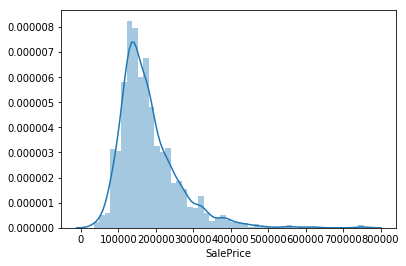

In [834]:
# checking the distribution of target variable SalePrice

sns.distplot(data['SalePrice'])
plt.show()

#### The target variable seems to be skewed to the right. So, the target variable has to be transformed inorder  to make the distribution normal.


####  

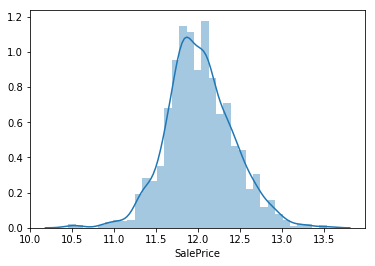

In [835]:
sns.distplot(np.log(data['SalePrice']))
plt.show()

#### By looking at the above plot, it is clear that the distribution of target variable is normal when it is transformed to log scale.


####  

In [836]:
# Transforming the target variable to log scale

data['SalePrice'] = np.log(data['SalePrice'])

## Train-test Split

In [837]:
# Splitting the data into train and test dataframes.

df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)
df_train.shape
df_test.shape

(439, 153)

## Scaling the numerical columns

In [838]:
num_cols = data.select_dtypes(include=['float64', 'int64']).drop(['Id', 'SalePrice'], 1).columns

scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_train.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
318,319,0.236301,0.039403,0.16,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,...,0,0,0,0,0,0,1,0,1,0
239,240,0.106164,0.033981,0.00,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,...,0,0,0,0,0,0,0,0,1,0
986,987,0.130137,0.017931,0.00,0.000000,0.000000,0.207620,0.079378,0.145602,0.307022,...,0,0,0,1,0,0,0,0,1,0
1416,1417,0.133562,0.046139,0.00,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,...,0,0,0,0,0,0,0,0,1,0
390,391,0.099315,0.032409,0.00,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,...,0,0,0,0,0,1,0,0,1,0


In [839]:
# Splitting the train dataframe into y_train and X_train

y_train = df_train.pop('SalePrice')
X_train = df_train.drop(columns='Id', axis=1)

## Feature selection using RFE

In [840]:
# Selecting features using RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [841]:
# Checking the output of RFE.

list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 56),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 17),
 ('FullBath', True, 1),
 ('HalfBath', False, 95),
 ('BedroomAbvGr', False, 97),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 59),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 69),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 6),
 ('BuildingAge', True, 1),
 ('RemodelAge', True, 1),
 ('GarageAge', False, 61),
 ('MSSubClass_20', False, 23),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_45', False, 83),
 ('MSSubClass_50', False, 27),
 ('MSSubClass_60', False, 45),
 ('MSSubClass_70', False,

In [842]:
# Selecting the columns that have a true value from RFE output 

col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'BuildingAge', 'RemodelAge', 'MSSubClass_30', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_1Fam', 'BldgType_TwnhsE', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 'ExterQual_Ex',
       'ExterQual_Gd', 'ExterQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_Unf'],
      dtype='object')

In [843]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,BldgType_1Fam,BldgType_TwnhsE,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior2nd_CmentBd,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,BsmtExposure_Gd,BsmtFinType1_Unf
318,0.236301,0.039403,0.174876,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,...,1,0,0,0,0,0,1,0,1,0
239,0.106164,0.033981,0.016655,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,...,1,0,0,0,0,0,0,1,0,0
986,0.130137,0.017931,0.000000,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.000000,...,1,0,0,0,0,0,0,1,0,1
1416,0.133562,0.046139,0.000000,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.000000,...,0,0,0,0,0,0,0,1,0,1
390,0.099315,0.032409,0.042700,0.098031,0.140917,0.136343,0.196610,0.0,0.178517,0.333333,...,1,0,0,0,0,0,0,1,0,0


## Model Building

### Ridge Regression

In [844]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [845]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002909,0.000708,0.000594,0.000485,0.0001,{'alpha': 0.0001},-0.096446,-0.106225,-0.113034,-0.098001,...,-0.101981,0.006629,14,-0.097456,-0.088601,-0.090886,-0.097199,-0.097639,-0.094356,0.003837
1,0.003920,0.000255,0.000399,0.000489,0.001,{'alpha': 0.001},-0.096443,-0.106221,-0.113027,-0.098001,...,-0.101979,0.006626,13,-0.097457,-0.088602,-0.090885,-0.097198,-0.097639,-0.094356,0.003837
2,0.003116,0.000677,0.000715,0.000427,0.01,{'alpha': 0.01},-0.096417,-0.106179,-0.112960,-0.098003,...,-0.101955,0.006599,12,-0.097468,-0.088615,-0.090868,-0.097191,-0.097648,-0.094358,0.003839
3,0.003298,0.000412,0.000404,0.000495,0.05,{'alpha': 0.05},-0.096310,-0.106002,-0.112693,-0.098011,...,-0.101863,0.006491,11,-0.097519,-0.088687,-0.090799,-0.097173,-0.097689,-0.094373,0.003843
4,0.002533,0.000535,0.000403,0.000494,0.1,{'alpha': 0.1},-0.096199,-0.105810,-0.112406,-0.098023,...,-0.101772,0.006369,10,-0.097601,-0.088795,-0.090743,-0.097180,-0.097743,-0.094412,0.003846


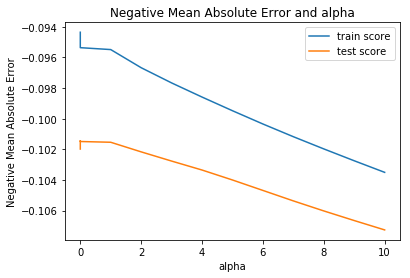

In [846]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### By looking at the above plot, when alpha is nearly 1, the difference between the train and test error is less and also the negative mean absolute error is minimum. so the optimal value of alpha for ridge regression is 1


####  

In [847]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge_df = pd.DataFrame.from_dict({'column': X_train_rfe.columns, 'coeff': ridge.coef_})
top_features_from_ridge_regression = ridge_df.sort_values(by='coeff', ascending=False).head(10)['column']
ridge_df.sort_values(by='coeff', ascending=False).head(10)

,column,coeff
8,GrLivArea,0.419453
5,1stFlrSF,0.395878
14,GarageCars,0.258041
6,2ndFlrSF,0.234724
38,Neighborhood_StoneBr,0.206580
37,Neighborhood_Somerst,0.204270
1,LotArea,0.200623
35,Neighborhood_NridgHt,0.189503
12,TotRmsAbvGrd,0.179222
45,ExterQual_Ex,0.169425


In [848]:
# Calculating the R2 score on train data set for ridge regression model

y_pred = ridge.predict(X_train_rfe)
y_pred
metrics.r2_score(y_train, y_pred)

0.880024750604706

In [849]:
# calculating the R2 score on test data set for ridge regression model

df_test[num_cols] = scaler.transform(df_test[num_cols])
y_test = df_test.pop('SalePrice')
X_test = df_test.drop(columns='Id', axis=1)
y_test_pred = ridge.predict(X_test[col])
metrics.r2_score(y_test, y_test_pred)

0.8477634438523298

#### Since the difference between the R2 scores of train and test sets is less, we can conclude that ridge regression model is performing well on the test set


####   

### Lasso Regression

In [850]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.15, 
                    0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [851]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.2]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036772,0.008522,0.000722,0.000371,0.0001,{'alpha': 0.0001},-0.095753,-0.104541,-0.111877,-0.098728,...,-0.101515,0.006010,1,-0.097664,-0.088848,-0.090436,-0.096960,-0.097756,-0.094333,0.003872
1,0.017539,0.002406,0.000765,0.000389,0.0002,{'alpha': 0.0002},-0.095494,-0.103610,-0.111582,-0.099605,...,-0.101546,0.005692,2,-0.098170,-0.089167,-0.090527,-0.097104,-0.097955,-0.094585,0.003908
2,0.018128,0.001342,0.000200,0.000399,0.0003,{'alpha': 0.0003},-0.095467,-0.103067,-0.111857,-0.099710,...,-0.101750,0.005603,3,-0.098855,-0.089614,-0.091025,-0.097245,-0.098417,-0.095031,0.003909
3,0.014295,0.002103,0.000409,0.000473,0.0004,{'alpha': 0.0004},-0.095077,-0.102748,-0.112197,-0.099888,...,-0.101885,0.005709,4,-0.099290,-0.090065,-0.091457,-0.097608,-0.098902,-0.095464,0.003905
4,0.009070,0.001511,0.000400,0.000489,0.0005,{'alpha': 0.0005},-0.094708,-0.102631,-0.112318,-0.100291,...,-0.102104,0.005744,5,-0.099745,-0.090568,-0.092023,-0.098139,-0.099521,-0.095999,0.003907


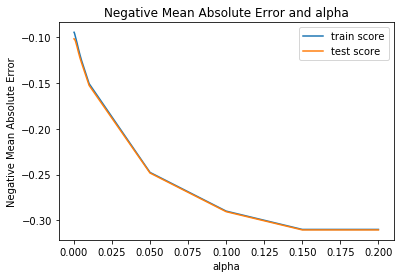

In [852]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### By looking at the above plot, when alpha is around 0.0005, the difference between the train and test error is less and also the negative mean absolute error is minimum. so the optimal value of alpha for lasso regression is 0.0005


####  

In [853]:
alpha = 0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [854]:
lasso_df = pd.DataFrame.from_dict({'column': X_train_rfe.columns, 'coeff': lasso.coef_})
top_features_from_lasso_regression = lasso_df.sort_values(by='coeff', ascending=False).head(10)['column']
lasso_df.sort_values(by='coeff', ascending=False).head(10)

,column,coeff
8,GrLivArea,1.039537
14,GarageCars,0.277478
38,Neighborhood_StoneBr,0.182535
35,Neighborhood_NridgHt,0.172102
37,Neighborhood_Somerst,0.170760
30,Neighborhood_Crawfor,0.159676
13,Fireplaces,0.153734
9,BsmtFullBath,0.147875
12,TotRmsAbvGrd,0.136543
34,Neighborhood_NoRidge,0.131277


In [855]:
# Calculating the R2 score on train data set for ridge regression model

y_pred = lasso.predict(X_train_rfe)
y_pred
metrics.r2_score(y_train, y_pred)

0.8741237956068151

In [856]:
# calculating the R2 score on test data set for ridge regression model

y_test_pred = lasso.predict(X_test[col])
metrics.r2_score(y_test, y_test_pred)

0.8485447247044468

#### Since the difference between the R2 scores of train and test sets is less, we can conclude that lasso regression model is performing well on the test set


####   

In [857]:
print("The top features from ridge regression model that define the sale price of the houses in australia are:")
print(top_features_from_ridge_regression)
print('')
print("The top features from lasso regression model that define the sale price of the houses in australia are:")
print(top_features_from_lasso_regression)

The top features from ridge regression model that define the sale price of the houses in australia are:
8                GrLivArea
5                 1stFlrSF
14              GarageCars
6                 2ndFlrSF
38    Neighborhood_StoneBr
37    Neighborhood_Somerst
1                  LotArea
35    Neighborhood_NridgHt
12            TotRmsAbvGrd
45            ExterQual_Ex
Name: column, dtype: object

The top features from lasso regression model that define the sale price of the houses in australia are:
8                GrLivArea
14              GarageCars
38    Neighborhood_StoneBr
35    Neighborhood_NridgHt
37    Neighborhood_Somerst
30    Neighborhood_Crawfor
13              Fireplaces
9             BsmtFullBath
12            TotRmsAbvGrd
34    Neighborhood_NoRidge
Name: column, dtype: object


## Additional code for subjunctive questions

In [861]:
# doubling the value of alpha for ridge regression to check the best predictors

alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge_df = pd.DataFrame.from_dict({'column': X_train_rfe.columns, 'coeff': ridge.coef_})
ridge_df.sort_values(by='coeff', ascending=False).head(10)

,column,coeff
8,GrLivArea,0.366353
5,1stFlrSF,0.337943
14,GarageCars,0.262709
6,2ndFlrSF,0.222783
12,TotRmsAbvGrd,0.198253
37,Neighborhood_Somerst,0.193563
38,Neighborhood_StoneBr,0.193531
35,Neighborhood_NridgHt,0.181511
30,Neighborhood_Crawfor,0.162849
4,TotalBsmtSF,0.158160


In [862]:
# doubling the value of alpha for lasso regression to check the best predictors

alpha = 0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train) 
lasso_df = pd.DataFrame.from_dict({'column': X_train_rfe.columns, 'coeff': lasso.coef_})
lasso_df.sort_values(by='coeff', ascending=False).head(10)

,column,coeff
8,GrLivArea,0.984531
14,GarageCars,0.297221
13,Fireplaces,0.176456
35,Neighborhood_NridgHt,0.158859
30,Neighborhood_Crawfor,0.146906
38,Neighborhood_StoneBr,0.141098
37,Neighborhood_Somerst,0.134102
9,BsmtFullBath,0.132568
12,TotRmsAbvGrd,0.121490
45,ExterQual_Ex,0.118864


In [863]:
# Rebuilding the lasso regression model after eliminating its five most important predictor variables

X_train_rfe = X_train_rfe.drop(['GrLivArea', 'GarageCars', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Neighborhood_Somerst'], 1)

lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.15, 
                    0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [864]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.2]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015427,0.001412,0.000869,0.000710,0.0001,{'alpha': 0.0001},-0.104925,-0.113609,-0.120094,-0.106935,...,-0.110885,0.005429,1,-0.107792,-0.097339,-0.099916,-0.106188,-0.106943,-0.103636,0.004201
1,0.014116,0.002923,0.000200,0.000400,0.0002,{'alpha': 0.0002},-0.104830,-0.112231,-0.119799,-0.108098,...,-0.110985,0.005030,2,-0.108281,-0.097792,-0.100114,-0.106734,-0.107340,-0.104052,0.004256
2,0.010144,0.003082,0.000599,0.000489,0.0003,{'alpha': 0.0003},-0.104732,-0.111254,-0.120226,-0.109017,...,-0.111240,0.005063,3,-0.109127,-0.098528,-0.100549,-0.107470,-0.107878,-0.104710,0.004306
3,0.004980,0.001726,0.000376,0.000462,0.0004,{'alpha': 0.0004},-0.104713,-0.110614,-0.120502,-0.109466,...,-0.111482,0.005149,4,-0.110059,-0.099260,-0.101018,-0.107926,-0.108607,-0.105374,0.004365
4,0.003339,0.000765,0.000438,0.000462,0.0005,{'alpha': 0.0005},-0.104623,-0.110395,-0.120643,-0.109892,...,-0.111735,0.005239,5,-0.110685,-0.099839,-0.101360,-0.108437,-0.109280,-0.105920,0.004429


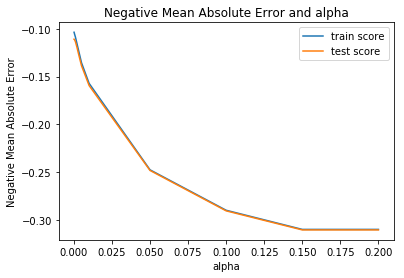

In [865]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [867]:
alpha = 0.0005

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)
lasso_df = pd.DataFrame.from_dict({'column': X_train_rfe.columns, 'coeff': lasso.coef_})
top_features_from_lasso_regression = lasso_df.sort_values(by='coeff', ascending=False).head(10)['column']
lasso_df.sort_values(by='coeff', ascending=False).head(5)

,column,coeff
5,1stFlrSF,0.999969
6,2ndFlrSF,0.412930
40,ExterQual_Ex,0.217048
11,TotRmsAbvGrd,0.180360
12,Fireplaces,0.177631
